In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors  import ListedColormap
from PIL import Image
import math
import pandas as pd
from sklearn.svm import SVC

In [2]:
dataset_image = "dataset.png"
rgb_code_dictionary={(255,255,255): -1, (255,0,0):0, (0,0,255):1}

In [3]:
def distance(c1, c2):
    (r1,g1,b1) = c1
    (r2,g2,b2) = c2
    return math.sqrt((r1 - r2)**2 + (g1 - g2) ** 2 + (b1 - b2) **2)
def get_closest(point):
    colors = list(rgb_code_dictionary.keys())
    closest_colors = sorted(colors, key=lambda color: distance(color, point))
    closest_color = closest_colors[0]
    code = rgb_code_dictionary[closest_color]
    return code

In [4]:
def write_data_to_csv(source: str, dest_path: str):
    image = Image.open(source)
    image =image.convert('RGB')
    width, height = image.size
    with open(dest_path, 'w') as dest_file:
        for x in range(0, width):
            for y in range(0, height):
                if(get_closest(image.getpixel((x,y)))!=-1):
                    dest_file.write(f'{x};{y};{get_closest(image.getpixel((x,y))[0:3])}\n')


In [5]:
def read_dataset_from_csv(dataset):
    dataset_df = pd.read_csv(dataset, sep=';', names=['x', 'y', 'label'])
    X = dataset_df.iloc[:, 0:2]
    y = dataset_df.iloc[:, 2]
    return(X,y)

In [6]:
def divide_dataset(X):
    np.random.shuffle(X)
    training, test = X[:math.floor(0.7*X.shape[0]),:], X[math.floor(0.7*X.shape[0]):,:]
    return training, test

In [7]:
write_data_to_csv(dataset_image,'dataset.csv')

In [8]:
X, y = read_dataset_from_csv('dataset.csv')
X = np.array(X)
y = np.array(y)

In [9]:
cmap = ListedColormap(['#FF0000','#0000FF'])

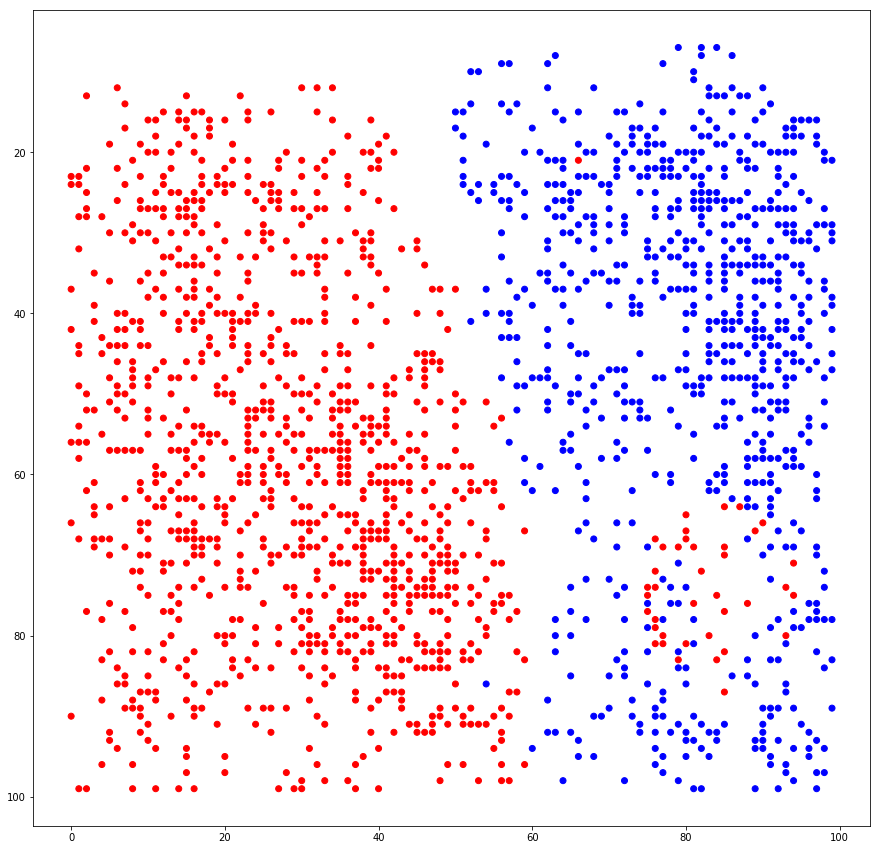

In [10]:
plt.figure(figsize=(15,15))
plt.scatter(X[:,0],X[:,1], c=y, cmap = cmap)
plt.gca().invert_yaxis()


In [11]:
data =np.c_[X,y]

In [12]:
n = 10000
X_random = np.random.rand(n, 2) * X.shape[0]

In [13]:
c_factors = [1e-6, 1e-5, 1e-4,1e-3,1e-2,1e-1,1, 10,100,1000]

In [14]:
def calculate_svm_score(X_train: np.array, y_train: np.array, X_test: np.array, y_tets:np.array, c_factors: list, kernel: str, **kwargs):
    test_scores = []
    train_scores = []
    margin_widths = []
    for c in c_factors:
        svm = SVC(C=c, kernel=kernel, **kwargs)
        svm.fit(X_train, y_train)
        train_score = svm.score(X_train, y_train)
        test_score = svm.score(X_test, y_test)
        decision = svm.decision_function(X_random)
        margin_width = np.sum(np.abs(decision) < 1) / len(X_random)
        test_scores.append(test_score)
        train_scores.append(train_score)
        margin_widths.append(margin_width)
    return np.array(test_scores), np.array(train_scores), np.array(margin_widths)

In [15]:
test_s = arr = np.empty((0,len(c_factors)), int)
train_s = np.empty((0,len(c_factors)), int)
margin_w = np.empty((0,len(c_factors)), int)
for i in range(20):
    train, test = divide_dataset(data)
    X_train, y_train = train[:,0:2], train[:,2]
    X_test, y_test = test[:,0:2], test[:,2]
    t, tr, m = calculate_svm_score(X_train, y_train, X_test, y_test, c_factors, 'linear')
    test_s = np.append(test_s, [t], axis =0)
    train_s = np.append(train_s, [tr], axis =0)
    margin_w = np.append(margin_w, [m], axis =0)

In [42]:
# test_s.mean(axis=0)
test_s.std(axis =0)

array([0.02689013, 0.00817045, 0.0067043 , 0.00680279, 0.00720622,
       0.00720622, 0.00720622, 0.00720622, 0.00720622, 0.00720622])

In [92]:
def plot_svm_accuracy(test_data, title ):
    mean = test_data.mean(axis =0)
    plt.figure(figsize=(18,9))
    std = test_data.std(axis=0)
    plt.plot(np.log10(c_factors), mean, '-')
    plt.errorbar(np.log10(c_factors),mean,   std, linestyle='None',  label = "error")
    plt.xlabel(r'$\log_{10}(c)$')
    plt.ylabel("acurracy")
    plt.title(title)
    plt.legend()
    plt.show()

### Linear kernel

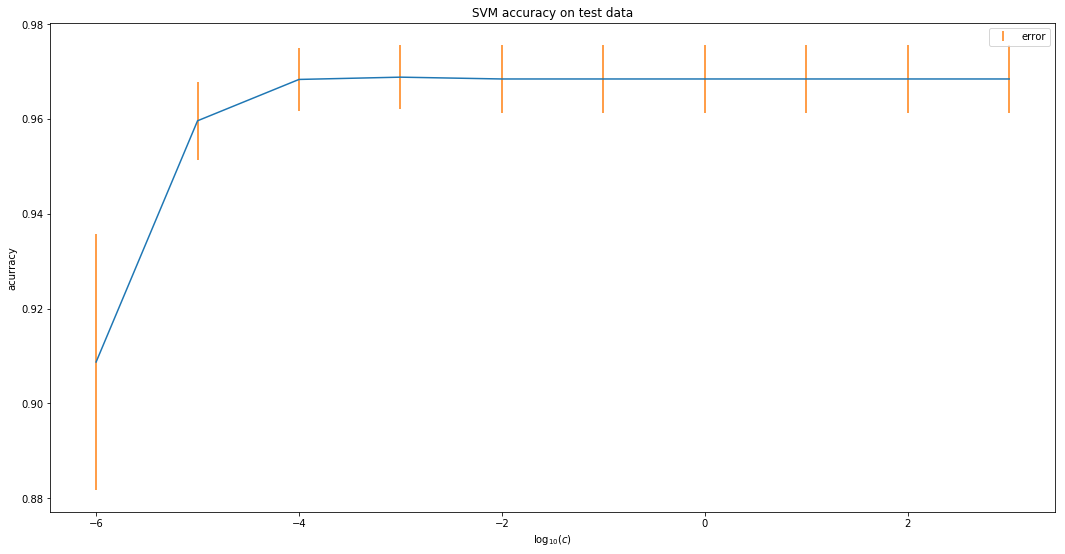

In [93]:
plot_svm_accuracy(test_s, 'SVM accuracy on test data')

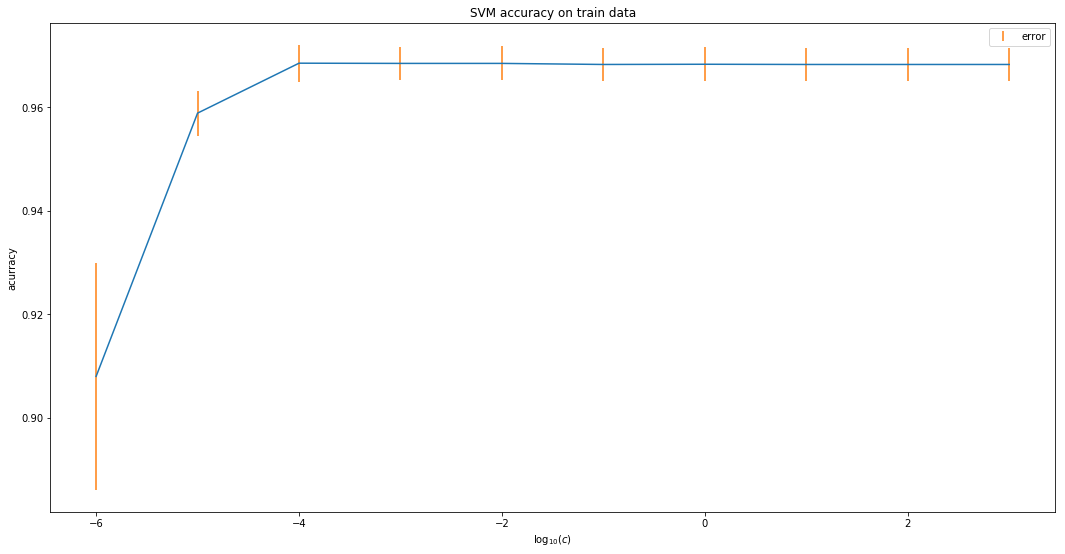

In [94]:
plot_svm_accuracy(train_s, 'SVM accuracy on train data')

In [97]:
def plot_margin_width(widths, title :str):
    mean = widths.mean(axis=0)
    plt.figure(figsize=(18,9))
    std = widths.std(axis=0)
    plt.plot(np.log10(c_factors), mean, '-')
    plt.errorbar(np.log10(c_factors),mean,   std, linestyle='None',  label = "error")
    plt.xlabel(r'$\log_{10}(c)$')
    plt.ylabel("width of margin")
    plt.title(title)
    plt.legend()
    plt.show()

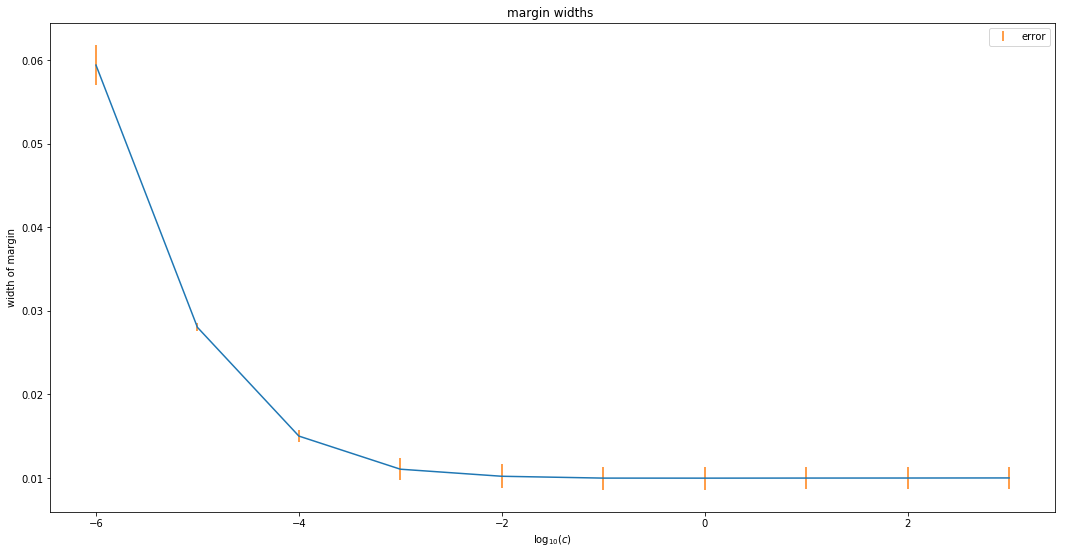

In [98]:
plot_margin_width(margin_w, 'margin widths ')

### Polynomial kernel

In [102]:
test_s = arr = np.empty((0,len(c_factors)), int)
train_s = np.empty((0,len(c_factors)), int)
margin_w = np.empty((0,len(c_factors)), int)
for i in range(20):
    train, test = divide_dataset(data)
    X_train, y_train = train[:,0:2], train[:,2]
    X_test, y_test = test[:,0:2], test[:,2]
    t, tr, m = calculate_svm_score(X_train, y_train, X_test, y_test, c_factors,kernel='poly', gamma='scale', coef0=3)
    test_s = np.append(test_s, [t], axis =0)
    train_s = np.append(train_s, [tr], axis =0)
    margin_w = np.append(margin_w, [m], axis =0)

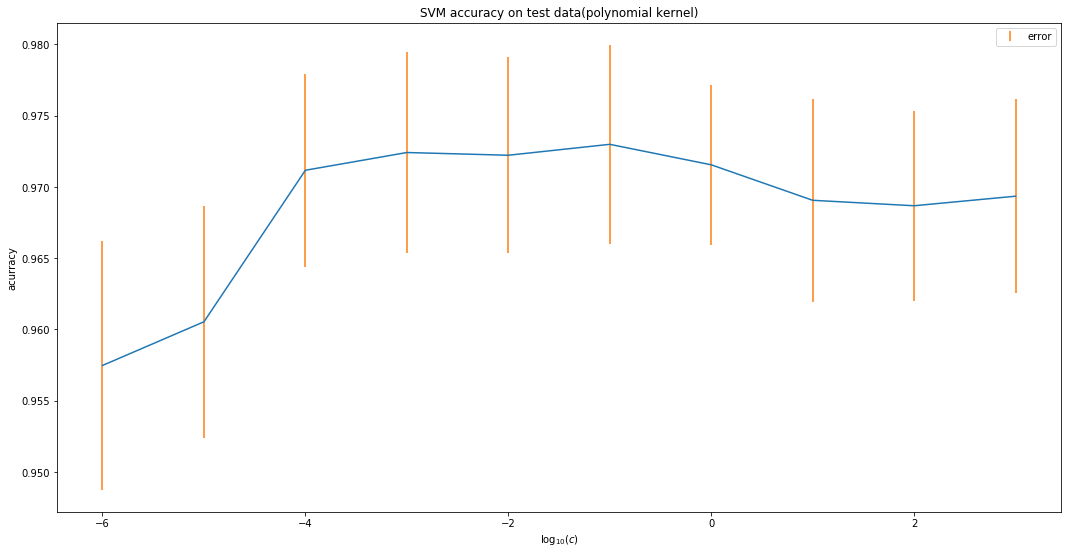

In [106]:
plot_svm_accuracy(test_s, 'SVM accuracy on test data(polynomial kernel)')

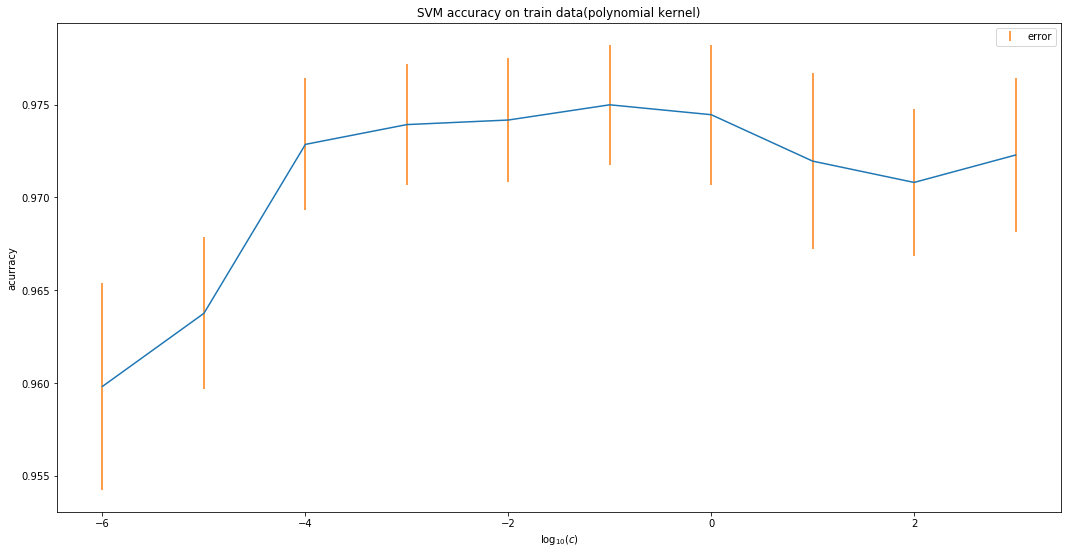

In [107]:
plot_svm_accuracy(train_s, 'SVM accuracy on train data(polynomial kernel)')

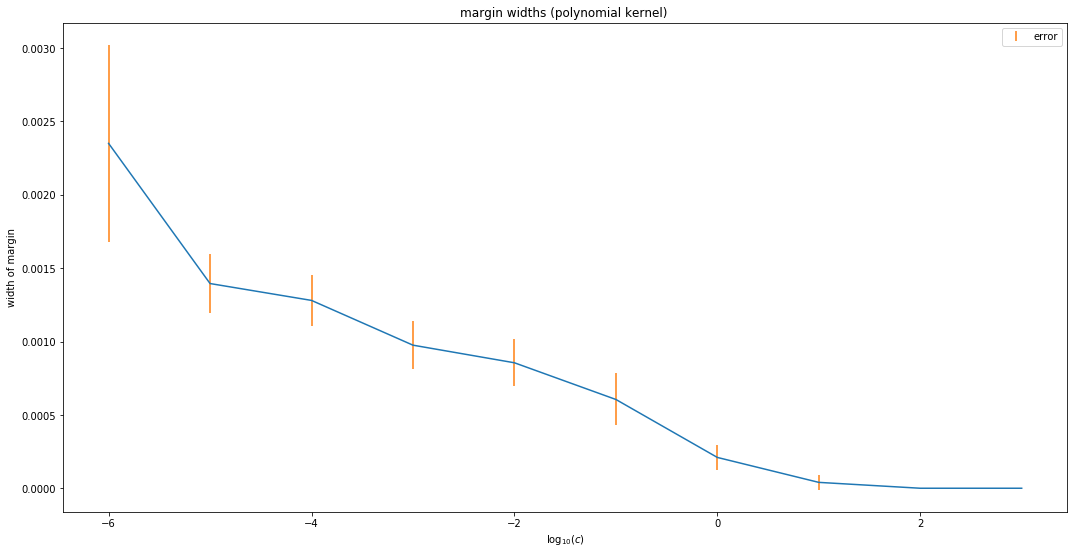

In [108]:
plot_margin_width(margin_w, 'margin widths (polynomial kernel) ')

### RBF KERNEL

In [109]:
test_s = arr = np.empty((0,len(c_factors)), int)
train_s = np.empty((0,len(c_factors)), int)
margin_w = np.empty((0,len(c_factors)), int)
for i in range(5):
    print(i)
    train, test = divide_dataset(data)
    X_train, y_train = train[:,0:2], train[:,2]
    X_test, y_test = test[:,0:2], test[:,2]
    t, tr, m = calculate_svm_score(X_train, y_train, X_test, y_test, c_factors,kernel='rbf', gamma=0.0001)
    test_s = np.append(test_s, [t], axis =0)
    train_s = np.append(train_s, [tr], axis =0)
    margin_w = np.append(margin_w, [m], axis =0)

0
1
2
3
4


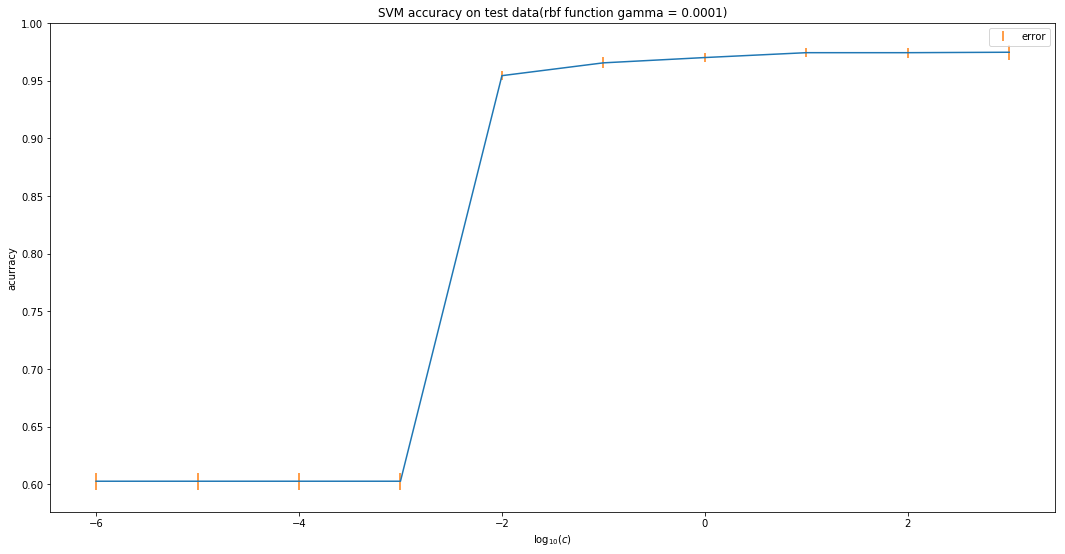

In [110]:
plot_svm_accuracy(test_s, 'SVM accuracy on test data(rbf function gamma = 0.0001)')

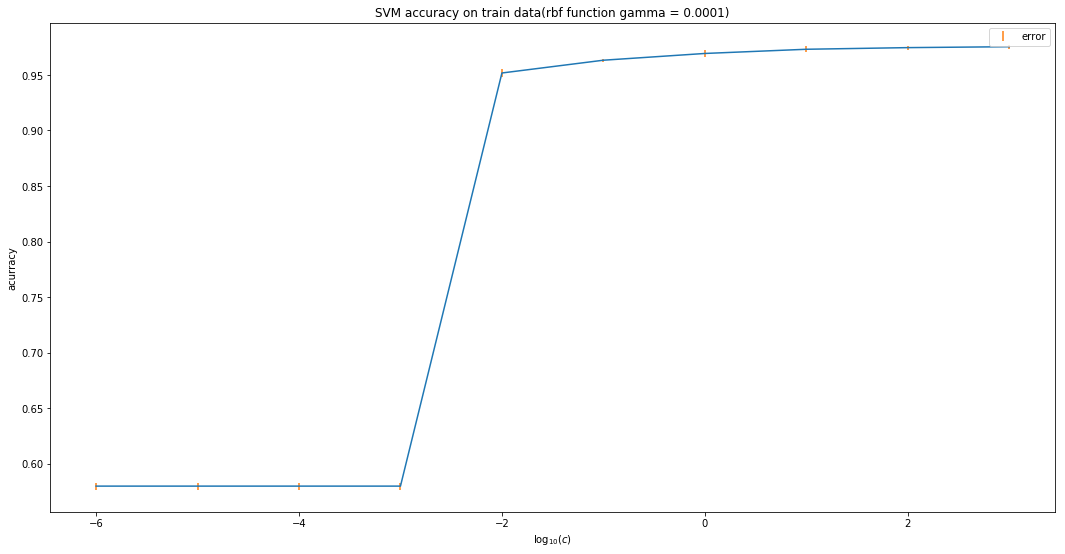

In [112]:
plot_svm_accuracy(train_s, 'SVM accuracy on train data(rbf function gamma = 0.0001)')

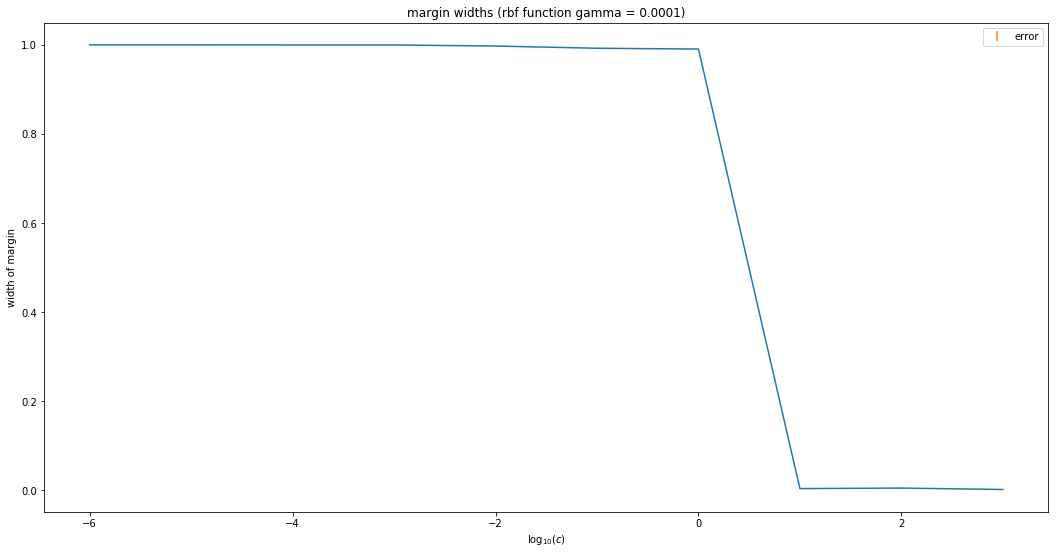

In [113]:
plot_margin_width(margin_w, 'margin widths (rbf function gamma = 0.0001)')

In [114]:
test_s = arr = np.empty((0,len(c_factors)), int)
train_s = np.empty((0,len(c_factors)), int)
margin_w = np.empty((0,len(c_factors)), int)
for i in range(5):
    print(i)
    train, test = divide_dataset(data)
    X_train, y_train = train[:,0:2], train[:,2]
    X_test, y_test = test[:,0:2], test[:,2]
    t, tr, m = calculate_svm_score(X_train, y_train, X_test, y_test, c_factors,kernel='rbf', gamma=0.01)
    test_s = np.append(test_s, [t], axis =0)
    train_s = np.append(train_s, [tr], axis =0)
    margin_w = np.append(margin_w, [m], axis =0)

0
1
2
3
4


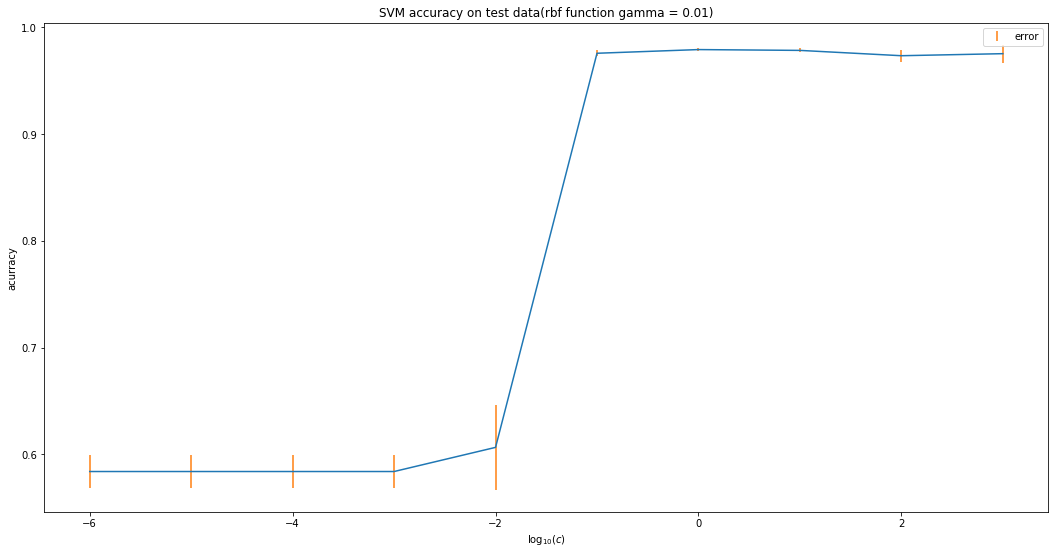

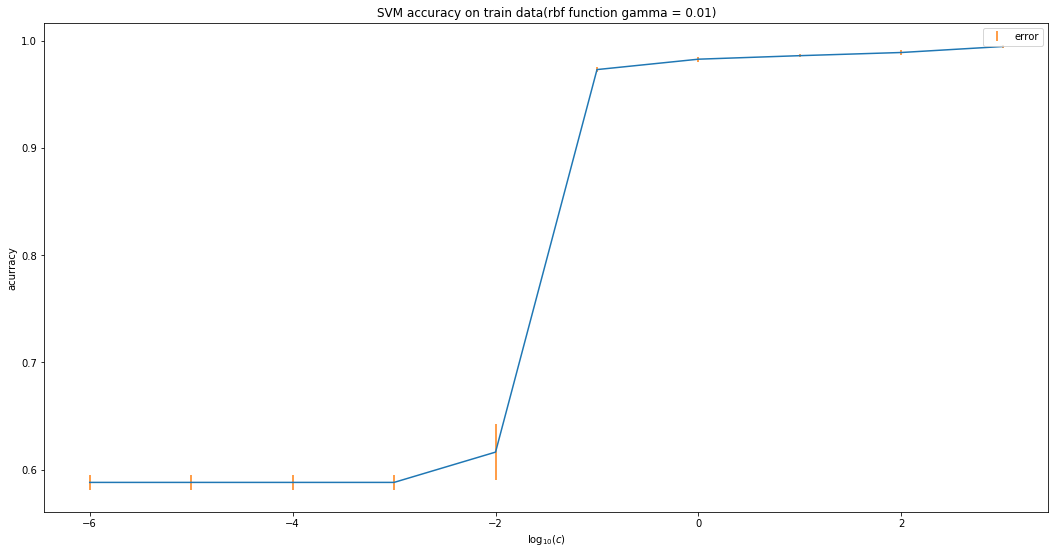

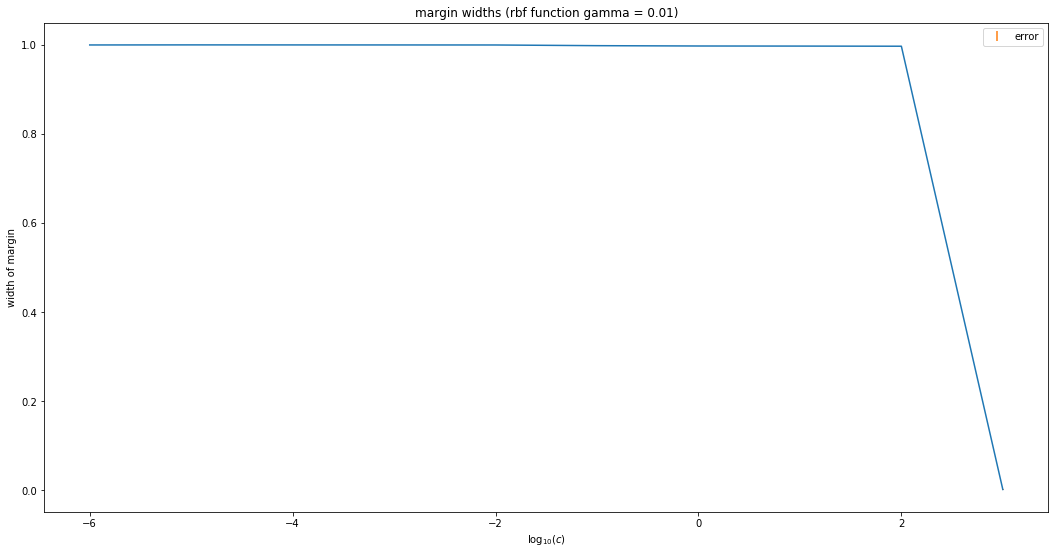

In [115]:
plot_svm_accuracy(test_s, 'SVM accuracy on test data(rbf function gamma = 0.01)')
plot_svm_accuracy(train_s, 'SVM accuracy on train data(rbf function gamma = 0.01)')
plot_margin_width(margin_w, 'margin widths (rbf function gamma = 0.01)')

In [120]:
test_s = arr = np.empty((0,len(c_factors)), int)
train_s = np.empty((0,len(c_factors)), int)
margin_w = np.empty((0,len(c_factors)), int)
for i in range(5):
    print(i)
    train, test = divide_dataset(data)
    X_train, y_train = train[:,0:2], train[:,2]
    X_test, y_test = test[:,0:2], test[:,2]
    t, tr, m = calculate_svm_score(X_train, y_train, X_test, y_test, c_factors,kernel='rbf', gamma=1)
    test_s = np.append(test_s, [t], axis =0)
    train_s = np.append(train_s, [tr], axis =0)
    margin_w = np.append(margin_w, [m], axis =0)

0
1
2
3
4


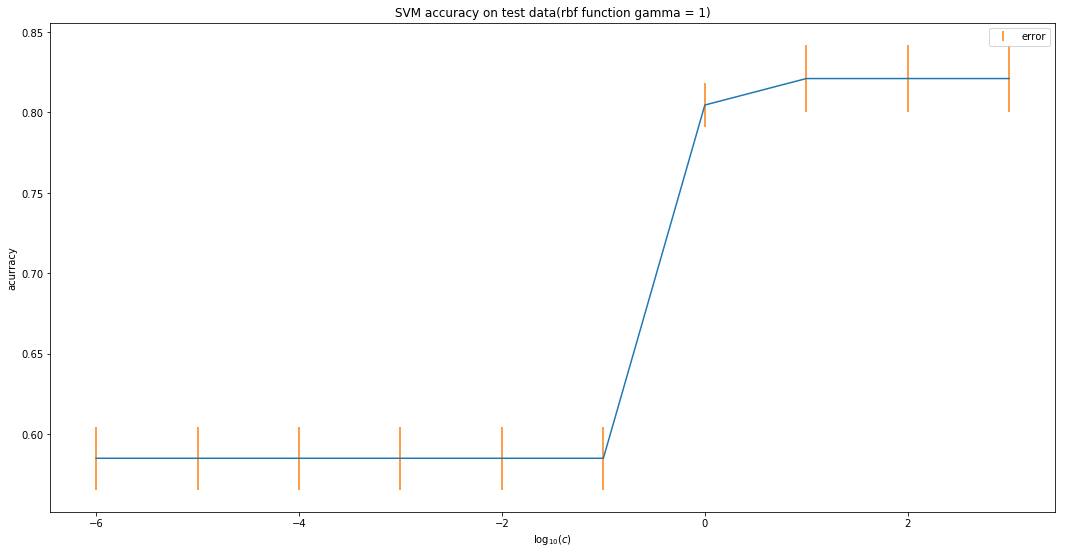

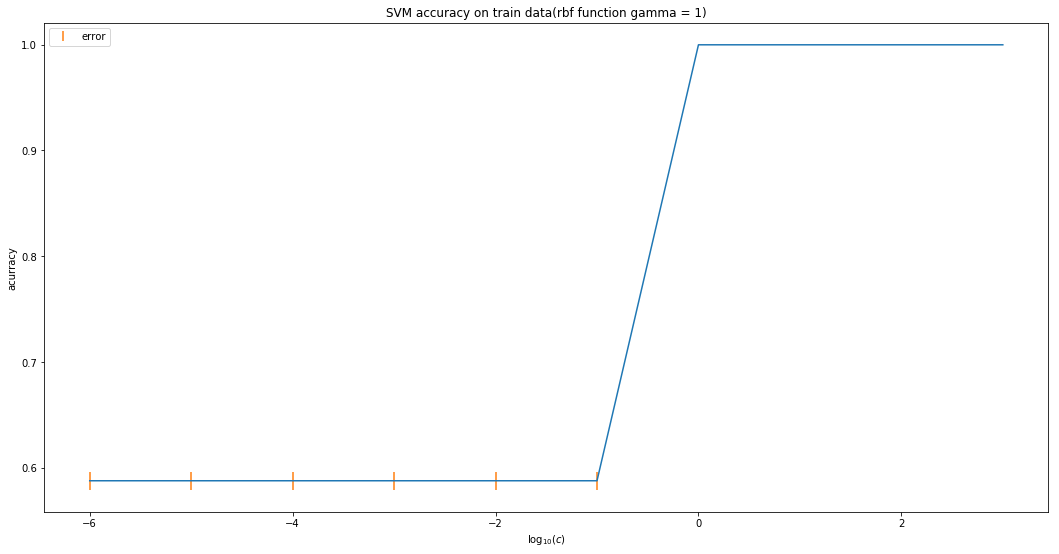

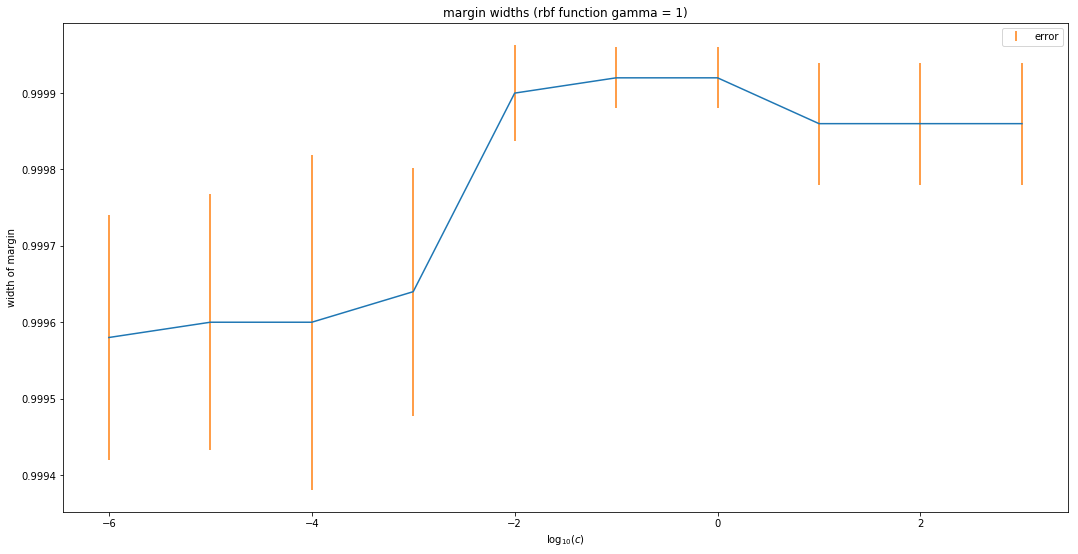

In [121]:
plot_svm_accuracy(test_s, 'SVM accuracy on test data(rbf function gamma = 1)')
plot_svm_accuracy(train_s, 'SVM accuracy on train data(rbf function gamma = 1)')
plot_margin_width(margin_w, 'margin widths (rbf function gamma = 1)')

In [118]:
test_s = arr = np.empty((0,len(c_factors)), int)
train_s = np.empty((0,len(c_factors)), int)
margin_w = np.empty((0,len(c_factors)), int)
for i in range(5):
    print(i)
    train, test = divide_dataset(data)
    X_train, y_train = train[:,0:2], train[:,2]
    X_test, y_test = test[:,0:2], test[:,2]
    t, tr, m = calculate_svm_score(X_train, y_train, X_test, y_test, c_factors,kernel='rbf', gamma=10)
    test_s = np.append(test_s, [t], axis =0)
    train_s = np.append(train_s, [tr], axis =0)
    margin_w = np.append(margin_w, [m], axis =0)

0
1
2
3
4


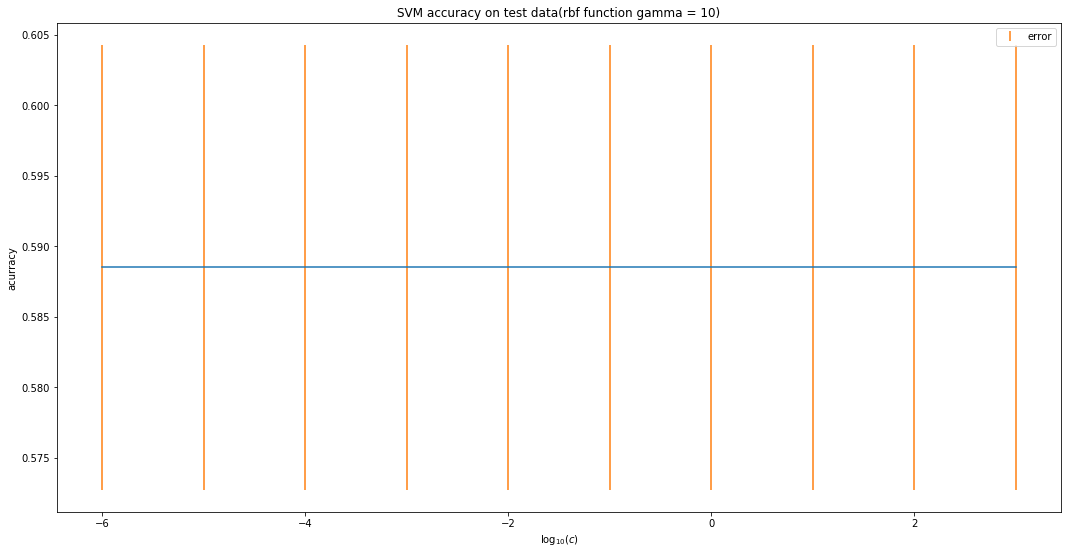

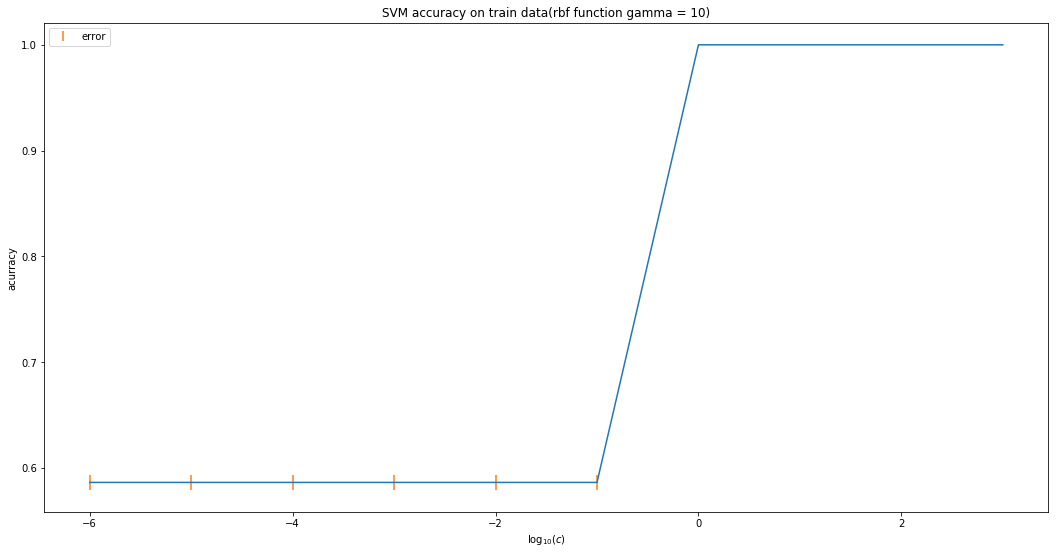

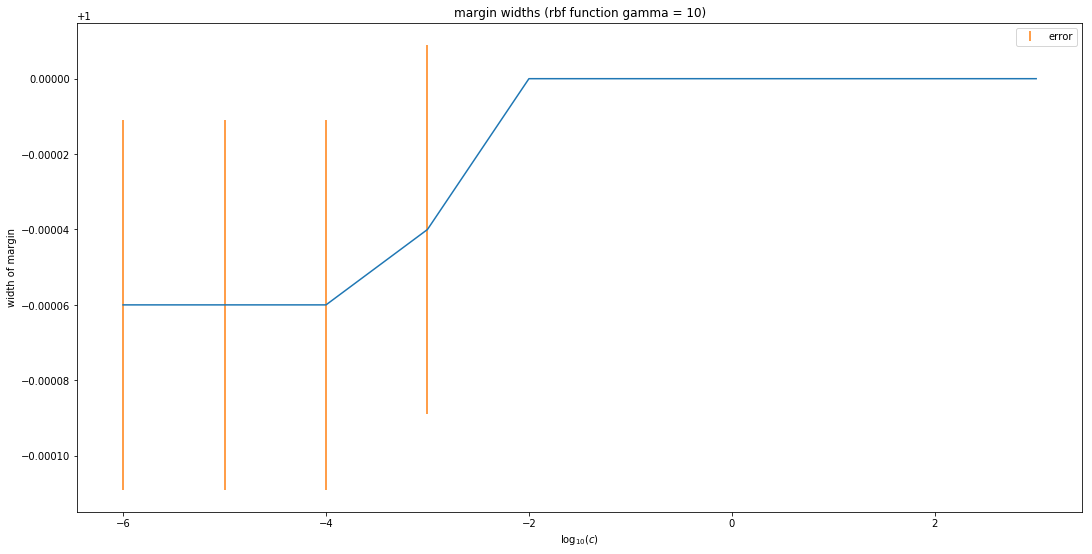

In [119]:
plot_svm_accuracy(test_s, 'SVM accuracy on test data(rbf function gamma = 10)')
plot_svm_accuracy(train_s, 'SVM accuracy on train data(rbf function gamma = 10)')
plot_margin_width(margin_w, 'margin widths (rbf function gamma = 10)')

In [125]:
train, test = divide_dataset(data)
X_train, y_train = train[:,0:2], train[:,2]
X_test, y_test = test[:,0:2], test[:,2]

In [ ]:
X_train

In [134]:
X.shape[0]

1740

In [142]:
n = 100000
X_random = np.random.rand(n, 2) * 100

In [158]:
def visualize_svm(svm:SVC, c_, gamma):
    svm.fit(X_train, y_train)
    decisions = svm.decision_function(X_random)
    for x_s, d in zip(X_random, decisions):
        a = min(np.abs(d), 1)
        plt.scatter([x_s[0]], [x_s[1]], c=["b" if d > 0 else "r"], alpha=a, s=0.1)
    plt.gca().invert_yaxis()
    plt.title(f"classification of rbf kernel svm with c = {c_}, gamma = {gamma}")
    plt.show()

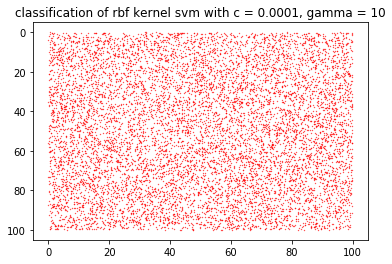

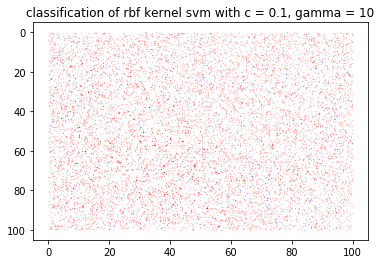

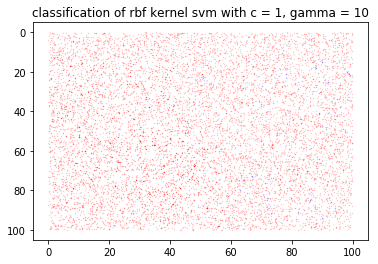

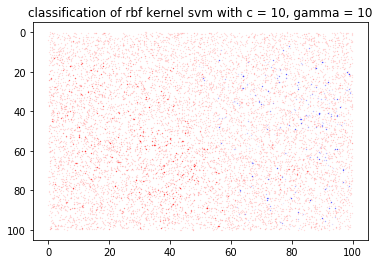

In [163]:
for svm in [
#     (SVC(kernel="linear", C=10e-4),'0.0001'),
#     (SVC(kernel="linear", C=10e-1),'0.1'),
#     (SVC(kernel="linear", C=1),'1'),
#     (SVC(kernel="linear", C=10),'10' )
#     (SVC(C=10e-4, kernel='poly', gamma='scale', coef0=3), '0.0001')
#     (SVC(C=10e-1, kernel='poly', gamma='scale', coef0=3), '0.1'),
#     (SVC(C=1, kernel='poly', gamma='scale', coef0=3),'1'),
#     (SVC(C=10, kernel='poly', gamma='scale', coef0=3),'10')
#     (SVC(C=10e-4, kernel='rbf', gamma=0.0001), '0.0001',0.0001),
#     (SVC(C=10e-1, kernel='rbf', gamma=0.0001), '0.1',0.0001),
#     (SVC(C=1, kernel='rbf', gamma=0.0001),'1',0.0001),
#     (SVC(C=10, kernel='rbf', gamma=0.0001),'10', 0.0001)
#     (SVC(C=10e-4, kernel='rbf', gamma=0.01), '0.0001',0.01),
#     (SVC(C=10e-1, kernel='rbf', gamma=0.01), '0.1',0.01),
#     (SVC(C=1, kernel='rbf', gamma=0.01),'1',0.01),
#     (SVC(C=10, kernel='rbf', gamma=0.01),'10', 0.01)
#     (SVC(C=10e-4, kernel='rbf', gamma=1), '0.0001',1),
#     (SVC(C=10e-1, kernel='rbf', gamma=1), '0.1',1),
#     (SVC(C=1, kernel='rbf', gamma=1),'1',1),
#     (SVC(C=10, kernel='rbf', gamma=1),'10', 1)
    (SVC(C=10e-4, kernel='rbf', gamma=10), '0.0001',10),
    (SVC(C=10e-1, kernel='rbf', gamma=10), '0.1',10),
    (SVC(C=1, kernel='rbf', gamma=10),'1',10),
    (SVC(C=10, kernel='rbf', gamma=10),'10', 10)

]:
    visualize_svm(svm[0],svm[1], svm[2])